# Import Libraries 

In [1]:
import os
import numpy as np
import pandas as pd

import csv
import re
import string
import pickle

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%config Completer.use_jedi = False

In [3]:
pd.set_option("max_colwidth", 200)

# Extract and Load data

In [4]:
os.chdir("..")

In [5]:
dataset_path = os.path.join(os.getcwd(), 
                            'Dataset\\SMSSpamCollection'
                            ) 
column_names = [
    'Label', 
    'Text'
    ]
sms_df = pd.read_csv(dataset_path, 
                     sep="\t", 
                     header=None, 
                     encoding="utf-8", 
                     quoting=csv.QUOTE_NONE, 
                     names=column_names
                     )

# Understanding Data

In [6]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5574 non-null   object
 1   Text    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
ham_count, spam_count = list(sms_df['Label'].value_counts())

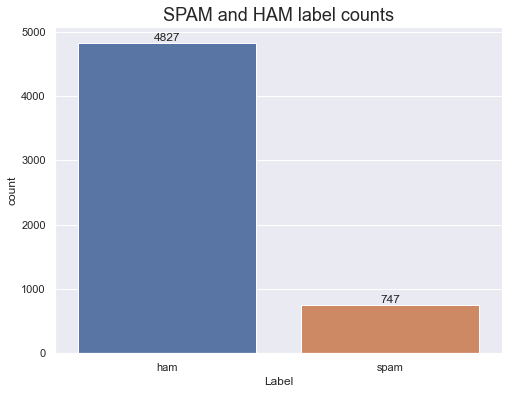

In [8]:
sns.set(rc = {'figure.figsize':(8,6)})
ax = sns.countplot(x='Label', 
                  data=sms_df
                  )
ax.set_title('SPAM and HAM label counts', fontsize=18)
for label in ax.containers:
    ax.bar_label(label)

In [9]:
sms_df[sms_df['Label'] == 'spam']['Text'][:5]

2       Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
5               FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
8     WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9        Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
11                         SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info
Name: Text, dtype: object

In [10]:
sms_df[sms_df['Label'] == 'ham']['Text'][:5]

0    Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1                                                                                      Ok lar... Joking wif u oni...
3                                                                  U dun say so early hor... U c already then say...
4                                                      Nah I don't think he goes to usf, he lives around here though
6                                      Even my brother is not like to speak with me. They treat me like aids patent.
Name: Text, dtype: object

In [11]:
sms_df['Length'] = [len(x) for x in sms_df['Text']]
avg_len_df = sms_df.groupby('Label', as_index=False)['Length'].mean()
avg_len_df

,Label,Length
0,ham,71.471929
1,spam,138.676037


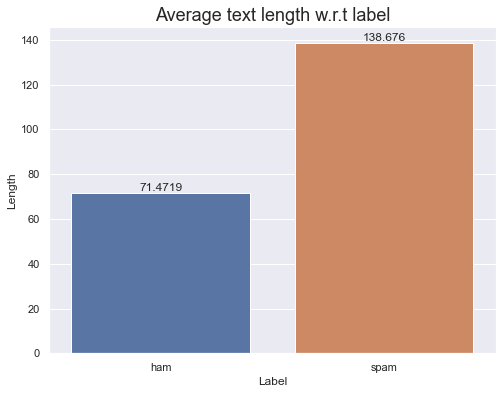

In [12]:
sns.set(rc = {'figure.figsize':(8,6)})
ax = sns.barplot(x='Label', 
                 y='Length',
                 data=avg_len_df
                )
ax.set_title('Average text length w.r.t label', fontsize=18)
for label in ax.containers:
    ax.bar_label(label)

# Pre-process data